In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

train = pd.read_csv('dota2Train.csv', header = None)

In [28]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
count,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,...,92650.000000,92650.000000,92650.000000,92650.000000,92650.0,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000
mean,0.053038,175.864145,3.317572,2.384587,-0.001630,-0.000971,0.000691,-0.000799,-0.002008,0.003173,...,-0.001371,-0.000950,0.000885,0.000594,0.0,0.001025,0.000648,-0.000227,-0.000043,0.000896
std,0.998598,35.658214,2.633070,0.486833,0.402004,0.467672,0.165052,0.355393,0.329348,0.483950,...,0.535024,0.206112,0.283985,0.155940,0.0,0.220703,0.204166,0.168707,0.189868,0.139033
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
train.iloc[:, 0] = train.iloc[:, 0].replace(-1, 0)
train.iloc[:, 0]

0        0
1        1
2        1
3        1
4        0
5        1
6        1
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       0
15       0
16       1
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       1
25       0
26       0
27       1
28       1
29       0
        ..
92620    0
92621    0
92622    1
92623    0
92624    1
92625    1
92626    1
92627    0
92628    0
92629    0
92630    0
92631    0
92632    1
92633    1
92634    0
92635    1
92636    1
92637    1
92638    0
92639    1
92640    1
92641    1
92642    1
92643    0
92644    1
92645    0
92646    1
92647    1
92648    0
92649    0
Name: 0, Length: 92650, dtype: int64

In [3]:
X = train.iloc[:, 1: ]
y = train.iloc[:, 0]
print(y)

0        0
1        1
2        1
3        1
4        0
5        1
6        1
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       0
15       0
16       1
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       1
25       0
26       0
27       1
28       1
29       0
        ..
92620    0
92621    0
92622    1
92623    0
92624    1
92625    1
92626    1
92627    0
92628    0
92629    0
92630    0
92631    0
92632    1
92633    1
92634    0
92635    1
92636    1
92637    1
92638    0
92639    1
92640    1
92641    1
92642    1
92643    0
92644    1
92645    0
92646    1
92647    1
92648    0
92649    0
Name: 0, Length: 92650, dtype: int64


In [4]:
clf = linear_model.LogisticRegression()
params = {'penalty':['l1', 'l2'], 'C':[0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000]}
clf_optimize = GridSearchCV(clf, params, cv = 5, scoring = 'accuracy')
clf_optimize.fit(X, y)
print('Cross Validation Accuracy: ', clf_optimize.best_score_)
print('Optimal Parameter: ', clf_optimize.best_params_)

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

Cross Validation Accuracy:  0.5995143011332974
Optimal Parameter:  {'C': 0.1, 'penalty': 'l1'}


In [5]:
test = pd.read_csv('dota2Test.csv', header = None)

test.iloc[:, 0] = test.iloc[:, 0].replace(-1, 0)
test.iloc[:, 0]

Xtest = test.iloc[:, 1: ]
ytest = test.iloc[:, 0]
#print(ytest)

pred = clf_optimize.predict(Xtest)
print('Test Data Accuracy: ', accuracy_score(ytest, pred), '\n')
print(classification_report(ytest, pred))

Test Data Accuracy:  0.5967553914901884 

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      4792
           1       0.61      0.67      0.64      5502

   micro avg       0.60      0.60      0.60     10294
   macro avg       0.59      0.59      0.59     10294
weighted avg       0.59      0.60      0.59     10294



Confusion matrix, without normalization
[[2463 2329]
 [1822 3680]]
Normalized confusion matrix
[[0.51 0.49]
 [0.33 0.67]]


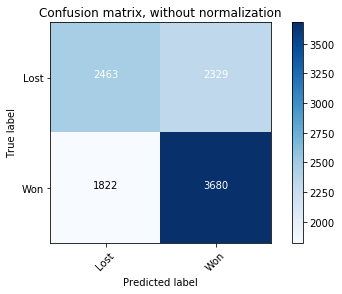

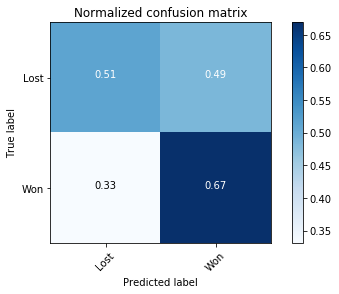

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       
cnf_matrix = confusion_matrix(ytest, pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Lost', 'Won'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Lost', 'Won'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

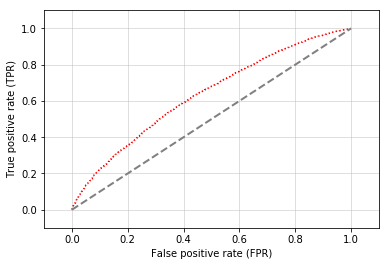

In [8]:
pred2 = clf_optimize.fit(X, y).predict_proba(Xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, pred2)

plt.plot(fpr, tpr, color='red', linestyle=':', label='lr')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])   
plt.ylim([-0.1, 1.1])   
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()